## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [5]:
x=df['Loan_ID'].duplicated().sum()
print(f"There are {x} duplicate Loan IDs")

There are 0 duplicate Loan IDs


In [6]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [7]:
df.Property_Area.unique()	

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

**Null values in the data**

In [9]:
for label in df.columns:
    print(f"There are {df[label].isnull().sum()} null values in {label}.")

There are 0 null values in Loan_ID.
There are 13 null values in Gender.
There are 3 null values in Married.
There are 15 null values in Dependents.
There are 0 null values in Education.
There are 32 null values in Self_Employed.
There are 0 null values in ApplicantIncome.
There are 0 null values in CoapplicantIncome.
There are 22 null values in LoanAmount.
There are 14 null values in Loan_Amount_Term.
There are 50 null values in Credit_History.
There are 0 null values in Property_Area.
There are 0 null values in Loan_Status.


In [10]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [11]:
x=df.isnull().sum().sum()
print(f"There are {x} null values in the dataset")

There are 149 null values in the dataset


**Dropping a column (Loan ID)**

In [13]:
df=df.drop(['Loan_ID'],axis=1)

**Filling null values**

In [15]:

df['Gender']=df['Gender'].fillna('Female');
df['Married']=df['Married'].fillna(df['Married'].mode()[0]);
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0]);
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0]);
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0]);
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0]);
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median());


In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
df[df['Loan_Status']=='Y'].value_counts().sum()

422

In [18]:
df[df['Loan_Status']=='N'].value_counts().sum()

192

**Pairplot**

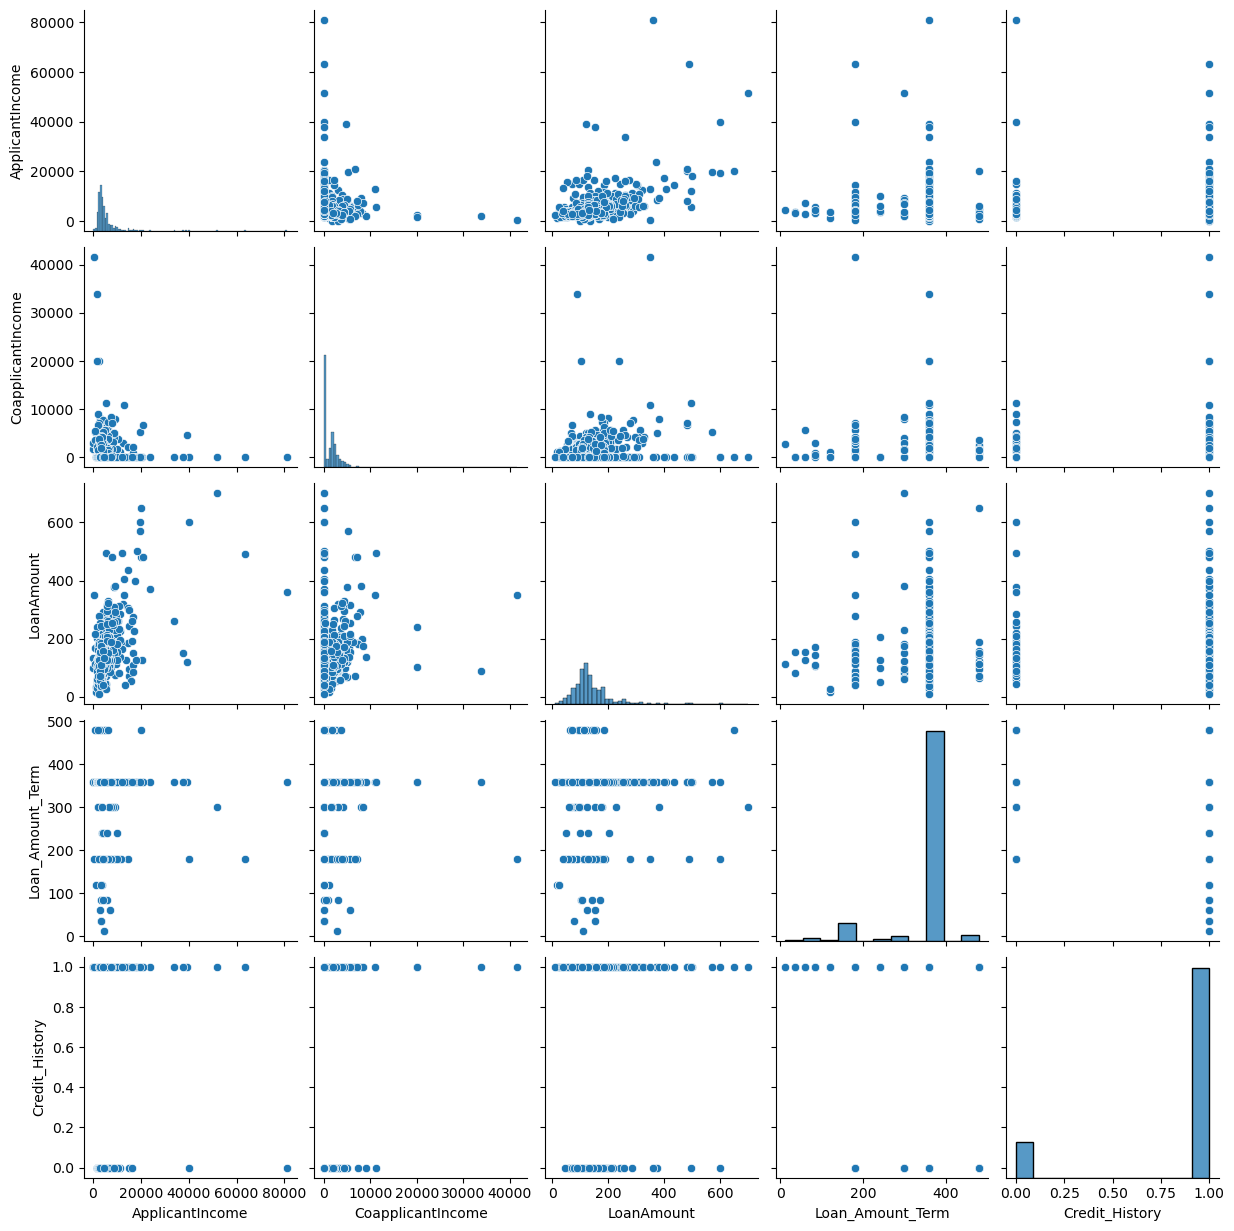

In [20]:
sns.pairplot(df)

In [21]:
print(f"There are {df.isnull().sum().sum()} null values now.")


There are 0 null values now.


**Data Visualisation using Matplotlib and Seaborn**

<Axes: >

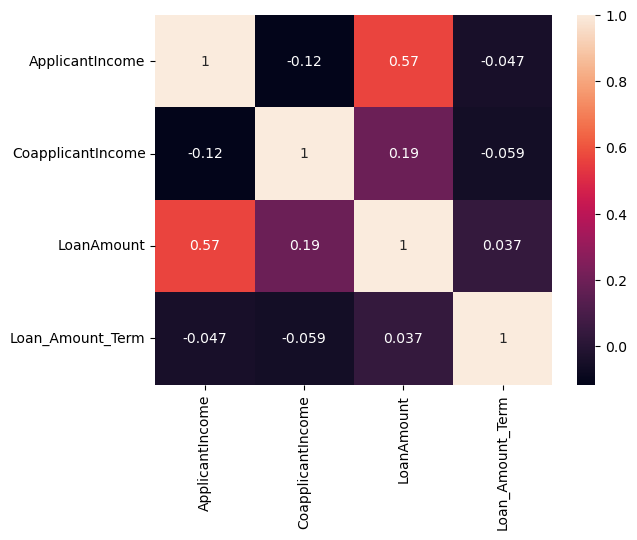

In [23]:
heat=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
heat=heat.corr()
sns.heatmap(heat,annot=True)

**How many Loans were approved?**

In [25]:
print(f"{df[df['Loan_Status']=='Y'].value_counts().sum()} loans were approved")

422 loans were approved


**How many Loans were rejected?**

In [27]:
print(f"{df[df['Loan_Status']=='N'].value_counts().sum()} loans were rejected")

192 loans were rejected


**How many married people applied for the loans?**

In [29]:
print(f"{df[df['Married']=='Yes'].value_counts().sum()} married people got their loan approved")

401 married people got their loan approved


**How many married people's loan got accepted?**

In [31]:
x=df[(df['Married'] == 'Yes') & (df['Loan_Status'] == 'Y')].shape[0]
print(f"{x} married people got their loan rejected")


288 married people got their loan rejected


**How many unmarried people's loan got accepted?**

In [33]:
y=df[(df['Married']=='No') & (df['Loan_Status'] == 'Y')].shape[0]
print(f"{y} unmarried people got their loan approved")


134 unmarried people got their loan approved


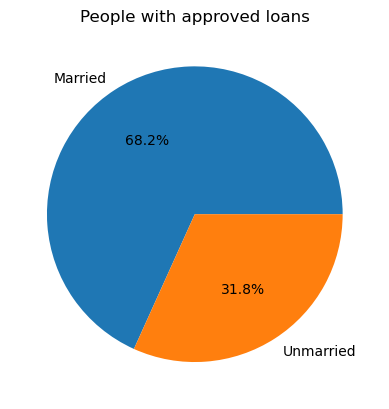

In [34]:
value=[x,y]
label=['Married','Unmarried']
plt.pie(value,labels=label,autopct='%0.1f%%');
plt.title("People with approved loans")
plt.show()

**How many self-employed people's loan got accepted?**

In [36]:
print(f"{df[(df['Self_Employed']=='Yes') & (df['Loan_Status']=='Y')].shape[0]} self employed people got their loan approved")

56 self employed people got their loan approved


**How many people with dependents had their loan approved?**

In [38]:
print(f"{df[(df['Dependents']!=0) & (df['Loan_Status']=='Y')].shape[0]} dependents got their loan approved")


422 dependents got their loan approved


**Is there any difference in the loan status because of gender?**

In [40]:
T=df[df['Loan_Status']=='Y'].groupby('Gender').size()
print(T) 

Gender
Female     83
Male      339
dtype: int64


**No of males present in the data**

In [42]:
total_male=df[df['Gender']=='Male'].shape[0]
print(f"There are total {total_male} males present in the data")  

There are total 489 males present in the data


**No of females present in the data**


In [44]:
total_female=df[df['Gender']=='Female'].shape[0]
print(f"There are total {total_female} females present in the data")

There are total 125 females present in the data


**Percentage**

**What percentage of females got their loan approved?**
 %percentage=(83/125)*100=66.40%

 **What percentage of males got their loan approved?**
 %percentage=(339/489)*100=69.32%



**How many female and male got there loan approved and how many did not?**

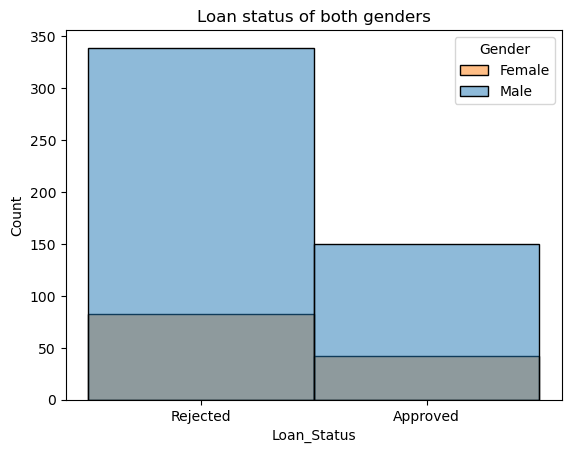

In [47]:
sns.histplot(data=df, x='Loan_Status', hue='Gender')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks([0,1],['Rejected','Approved'])
plt.title("Loan status of both genders")
plt.show()

**What is the range of loan amount of approved loan?**

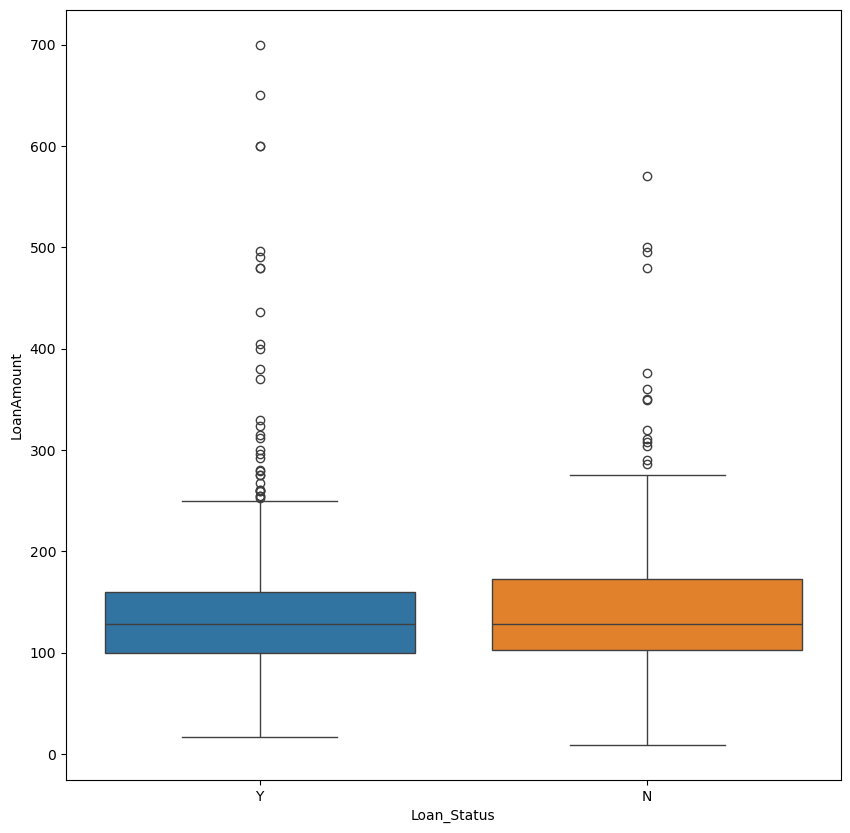

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Loan_Status',y='LoanAmount',hue='Loan_Status')
plt.show()

**Adding a new column in the dataset named as total income**

Total income=Applicant Income + Co-applicant Income

In [51]:
new_col=df['ApplicantIncome']+df['CoapplicantIncome']
df.insert(len(df.columns)-1,'Total_income',new_col.values)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_income,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,5849.0,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4941.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,6000.0,Y


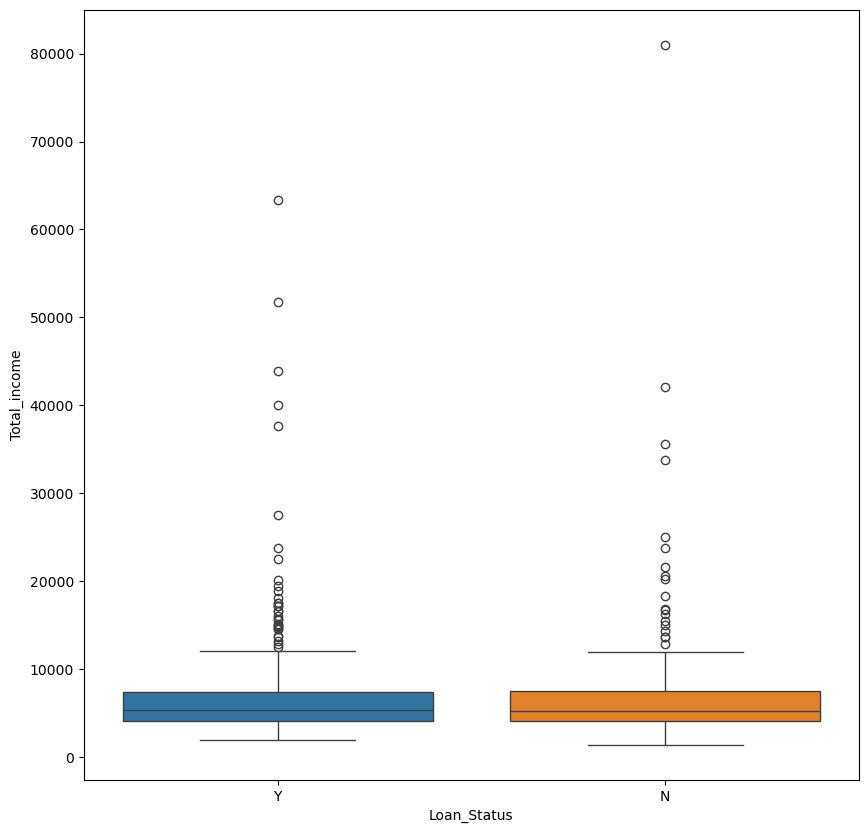

In [52]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x='Loan_Status',y='Total_income',hue='Loan_Status')
plt.show()

**Mathematical information about the data**

In [54]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,7024.705081
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


**Loan amount vs Total income**

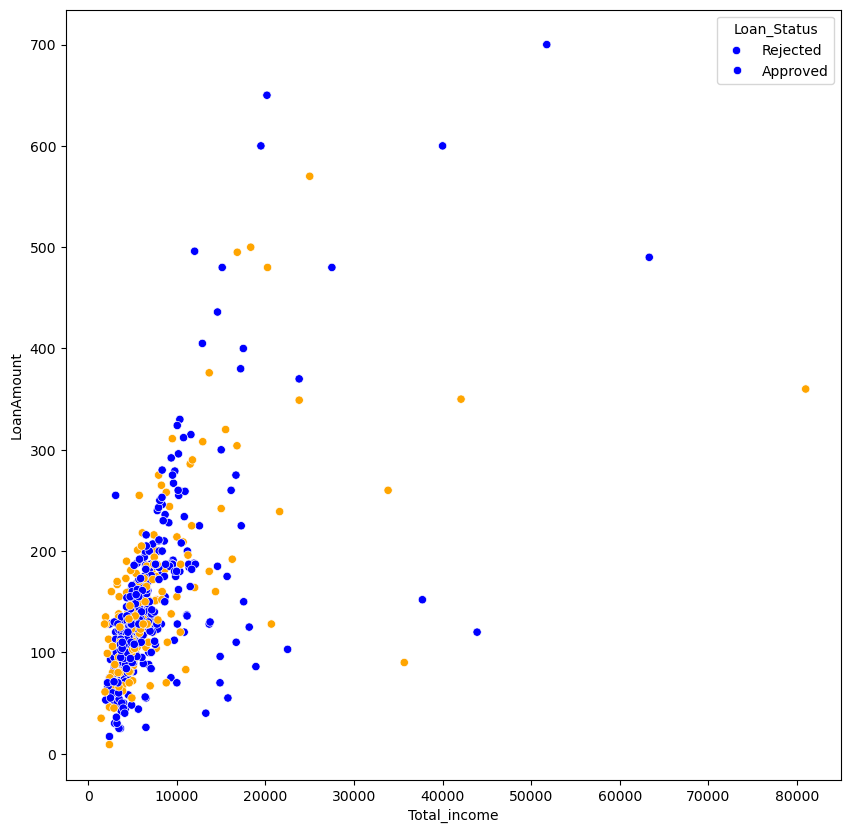

In [56]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x='Total_income', y='LoanAmount', hue='Loan_Status',palette=['blue','orange'])
plt.legend(title='Loan_Status',labels=['Rejected','Approved'])
plt.show()

## Feature Engineering

In [58]:
from sklearn.preprocessing import OneHotEncoder
inn=['Education','Property_Area','Gender']
ls=df['Loan_Status']
df=df.drop(['Loan_Status'],axis=1)
ohe=OneHotEncoder(sparse_output=False).set_output(transform='pandas')
for label in inn:
    ohetrans=ohe.fit_transform(df[[label]])
    df=df.drop([label],axis=1)
    df=pd.concat([df,ohetrans],axis=1)
df=pd.concat([df,ls],axis=1)    

In [59]:
df['Loan_Status']=(df['Loan_Status']=='Y').astype(int)
df['Self_Employed']=(df['Self_Employed']=='Yes').astype(int)
df['Married']=(df['Married']=='Yes').astype(int)
df['Dependents']=df['Dependents'].replace({'3+':3}).astype(int)
df.head()

,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Loan_Status
0,0,0,0,5849,0.0,128.0,360.0,1.0,5849.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,6091.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1,0,1,3000,0.0,66.0,360.0,1.0,3000.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1
3,1,0,0,2583,2358.0,120.0,360.0,1.0,4941.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
4,0,0,0,6000,0.0,141.0,360.0,1.0,6000.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1


**Splitting the data**

In [61]:
X=df.iloc[:,:16].values
Y=df.iloc[:,-1].values

In [62]:
from imblearn.over_sampling import SMOTE
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.2)
sm=SMOTE(random_state=42)
X_train,Y_train=sm.fit_resample(X_train,Y_train)

**Scaling the data**

In [64]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [65]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.741006,1.345356,-0.417643,-0.170869,-0.548305,-0.237047,0.285808,-1.994853,-0.406130,0.552849,-0.552849,-0.740041,1.458508,-0.738180,-0.498339,0.498339
1,-1.463103,-0.771067,-0.417643,-0.303929,-0.548305,-0.603168,0.285808,0.560870,-0.533284,0.552849,-0.552849,-0.740041,-0.744471,1.507119,2.184392,-2.184392
2,0.741006,-0.771067,-0.417643,-0.181781,0.312980,-0.437823,0.285808,0.560870,-0.035094,0.552849,-0.552849,-0.740041,-0.744471,1.507119,2.184392,-2.184392
3,-1.463103,-0.771067,-0.417643,-0.415165,-0.548305,-0.898426,0.285808,0.560870,-0.639583,0.552849,-0.552849,1.480338,-0.744471,-0.738180,2.184392,-2.184392
4,-1.463103,-0.771067,-0.417643,-0.187155,-0.548305,-0.130754,0.285808,-1.994853,-0.421693,0.552849,-0.552849,-0.740041,1.458508,-0.738180,2.184392,-2.184392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,0.741006,1.294248,-0.417643,-0.341113,0.052787,0.034306,0.285808,-1.994853,-0.302595,0.552849,-0.552849,1.480338,-0.744471,-0.738180,-0.498339,0.498339
672,-0.396976,-0.259210,1.039602,-0.547720,-0.548305,-0.579422,-0.184289,-0.675332,-0.766255,-0.759324,0.759324,0.333956,-0.744471,0.421069,-0.498339,0.498339
673,0.741006,-0.771067,1.622090,-0.108315,-0.548305,-0.126205,0.285808,0.560870,-0.346352,-1.988642,1.988642,-0.022955,-0.744471,0.781985,-0.498339,0.498339
674,0.289574,-0.771067,-0.417643,0.111386,-0.548305,0.595802,0.285808,-1.994853,-0.136402,-1.468110,1.468110,1.480338,-0.744471,-0.738180,-0.498339,0.498339


## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()

In [68]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'penalty': ['l1', 'l2', 'elasticnet', None], # Corrected quotes and format
    'solver': ['liblinear','saga'],
    'multi_class': ['auto', 'ovr']
}
cl=GridSearchCV(reg,param_grid=parameter,scoring='accuracy',cv=5) #cv means cross validation
cl.fit(X_train,Y_train)


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

**Best parameters**

In [69]:
print(cl.best_params_)

{'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}


**Best score**

In [70]:
print(cl.best_score_)

0.7174509803921569


In [71]:
Y_hat=cl.predict(X_test)

**Metrics**

In [72]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score

In [172]:
score=accuracy_score(Y_test,Y_hat)
print(f"{score} is the accuracy score")

0.7154471544715447 is the accuracy score


**Classification Report**

In [74]:
print(classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63        39
           1       0.82      0.89      0.85        84

    accuracy                           0.79       123
   macro avg       0.76      0.73      0.74       123
weighted avg       0.78      0.79      0.78       123



**Confusion Matrix**

In [75]:
C=confusion_matrix(Y_test,Y_hat)

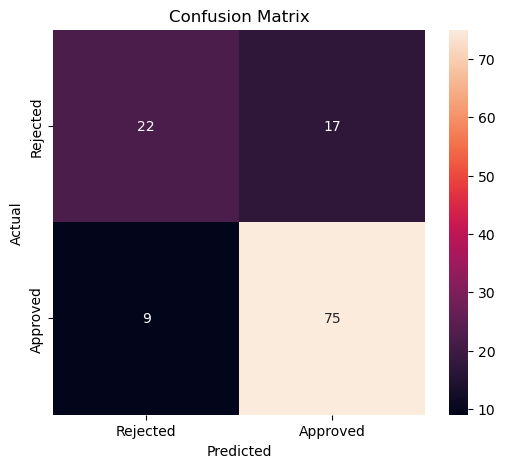

In [76]:
plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**F1 score**

In [77]:
f1_score(Y_test,Y_hat)

0.8522727272727273

## Support Vector Classifier

In [79]:
from sklearn.svm import SVC
support=SVC()
parameter = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':['scale', 'auto'],
    'decision_function_shape':['ovo','ovr']
}
sv=GridSearchCV(support,param_grid=parameter,scoring='accuracy',cv=5) 
sv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

**Best parameters and Best Accuracy Score**

In [80]:
print("Best Parameters:", sv.best_params_)
print("Best Accuracy Score:", sv.best_score_)

Best Parameters: {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy Score: 0.778169934640523


In [81]:
Y_hat=sv.predict(X_test)

**Accuracy Score**

In [82]:
score=accuracy_score(Y_test,Y_hat)
score

0.7723577235772358

**Classification Report**

In [83]:
print(classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

           0       0.76      0.41      0.53        39
           1       0.77      0.94      0.85        84

    accuracy                           0.77       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.77      0.77      0.75       123



**Confusion Matrix**

In [84]:
C=confusion_matrix(Y_test,Y_hat)

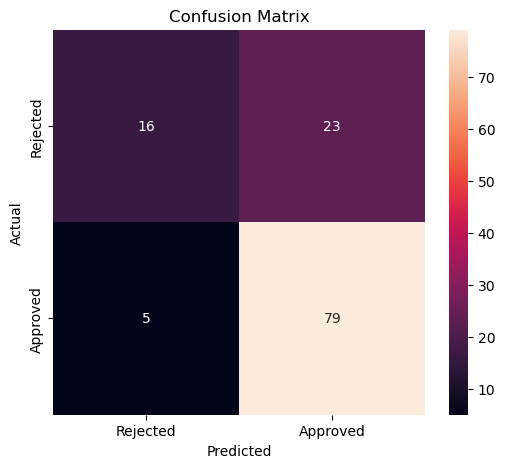

In [85]:
plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**F1 Score**

In [86]:
f1_score(Y_test,Y_hat)

0.8494623655913979

## Decision Trees

In [88]:
from sklearn import tree

In [89]:
dt=tree.DecisionTreeClassifier()

In [90]:
parameter={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random']
}
de=GridSearchCV(dt,param_grid=parameter,scoring='accuracy',cv=5) 
de.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

**Best parameters and Best Accuracy Score**

In [91]:
print("Best Parameters:", de.best_params_)
print("Best Accuracy Score:", de.best_score_)

Best Parameters: {'criterion': 'gini', 'splitter': 'best'}
Best Accuracy Score: 0.795958605664488


In [92]:
Y_hat=de.predict(X_test)
score=accuracy_score(Y_test,Y_hat)
score

0.7154471544715447

**Classification Report**

In [93]:
print(classification_report(Y_test,Y_hat))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56        39
           1       0.80      0.79      0.79        84

    accuracy                           0.72       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.72      0.72      0.72       123



**Confusion Matrix**

In [94]:
C=confusion_matrix(Y_test,Y_hat)

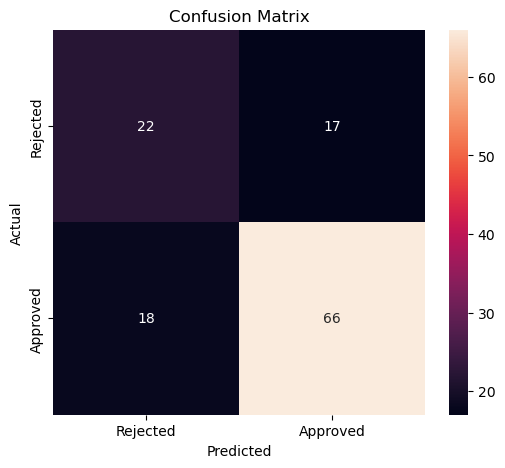

In [95]:
plt.figure(figsize=(6, 5))
sns.heatmap(C, annot=True, xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**F1 Score**

In [96]:
f1_score(Y_test,Y_hat)

0.7904191616766467